#📌 Extracción

In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("TelecomX") \
    .getOrCreate()

In [3]:
!wget -O TelecomX_Data.json https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json

--2026-02-19 15:32:59--  https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3807078 (3.6M) [text/plain]
Saving to: ‘TelecomX_Data.json’

TelecomX_Data.json  100%[===================>]   3.63M  --.-KB/s    in 0.05s   

2026-02-19 15:32:59 (66.7 MB/s) - ‘TelecomX_Data.json’ saved [3807078/3807078]



In [4]:
!ls

sample_data  TelecomX_Data.json


In [5]:
df = spark.read.json("TelecomX_Data.json")

In [6]:
df.show(10, truncate=False)

+-----+--------------------------------------------------------------+-------------------------+----------+-------------------------------------------+----------+
|Churn|account                                                       |customer                 |customerID|internet                                   |phone     |
+-----+--------------------------------------------------------------+-------------------------+----------+-------------------------------------------+----------+
|No   |{{65.6, 593.3}, One year, Yes, Mailed check}                  |{Yes, Yes, 0, Female, 9} |0002-ORFBO|{No, DSL, Yes, No, No, Yes, Yes}           |{No, Yes} |
|No   |{{59.9, 542.4}, Month-to-month, No, Mailed check}             |{No, No, 0, Male, 9}     |0003-MKNFE|{No, DSL, No, No, Yes, No, No}             |{Yes, Yes}|
|Yes  |{{73.9, 280.85}, Month-to-month, Yes, Electronic check}       |{No, No, 0, Male, 4}     |0004-TLHLJ|{Yes, Fiber optic, No, No, No, No, No}     |{No, Yes} |
|Yes  |{{98.0, 1237.85

#🔧 Transformación

In [7]:
from pyspark.sql.functions import col, when, trim

df = df.withColumn(
    "Total_clean",
    when(trim(col("account.Charges.Total")) == "", None)
    .otherwise(col("account.Charges.Total").cast("double"))
)

In [10]:
df_flat = df.select(
    col("customerID"),
    col("Churn"),

    col("customer.gender").alias("gender"),
    col("customer.SeniorCitizen").alias("SeniorCitizen"),
    col("customer.Partner").alias("Partner"),
    col("customer.Dependents").alias("Dependents"),
    col("customer.tenure").alias("tenure"),

    col("account.Contract").alias("Contract"),
    col("account.PaperlessBilling").alias("PaperlessBilling"),
    col("account.PaymentMethod").alias("PaymentMethod"),
    col("account.Charges.Monthly").alias("MonthlyCharges"),
    col("Total_clean").alias("TotalCharges"),

    col("internet.InternetService").alias("InternetService"),
    col("internet.OnlineSecurity").alias("OnlineSecurity"),
    col("internet.OnlineBackup").alias("OnlineBackup"),
    col("internet.DeviceProtection").alias("DeviceProtection"),
    col("internet.TechSupport").alias("TechSupport"),
    col("internet.StreamingTV").alias("StreamingTV"),
    col("internet.StreamingMovies").alias("StreamingMovies"),

    col("phone.PhoneService").alias("PhoneService"),
    col("phone.MultipleLines").alias("MultipleLines")
)

In [11]:
df_flat.printSchema()
df_flat.show(5, truncate=False)

root
 |-- customerID: string (nullable = true)
 |-- Churn: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: long (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: long (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)

+----------+-----+------+-------------+-------+----------+------+--------------+-------

#📊 Carga y análisis

In [12]:
df_flat.groupBy("Churn").count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|   No| 5174|
|  Yes| 1869|
|     |  224|
+-----+-----+



In [13]:
df_flat.groupBy("Contract", "Churn").count().orderBy("Contract").show()

+--------------+-----+-----+
|      Contract|Churn|count|
+--------------+-----+-----+
|Month-to-month|     |  130|
|Month-to-month|   No| 2220|
|Month-to-month|  Yes| 1655|
|      One year|     |   46|
|      One year|   No| 1307|
|      One year|  Yes|  166|
|      Two year|  Yes|   48|
|      Two year|     |   48|
|      Two year|   No| 1647|
+--------------+-----+-----+



In [14]:
df_flat.groupBy("InternetService", "Churn").count().show()

+---------------+-----+-----+
|InternetService|Churn|count|
+---------------+-----+-----+
|            DSL|  Yes|  459|
|    Fiber optic|  Yes| 1297|
|             No|   No| 1413|
|            DSL|     |   67|
|    Fiber optic|     |  102|
|    Fiber optic|   No| 1799|
|             No|     |   55|
|             No|  Yes|  113|
|            DSL|   No| 1962|
+---------------+-----+-----+



In [15]:
df_flat.groupBy("Churn").avg("MonthlyCharges").show()

+-----+-------------------+
|Churn|avg(MonthlyCharges)|
+-----+-------------------+
|   No|   61.2651236954001|
|  Yes|  74.44133226324232|
|     |  63.41227678571425|
+-----+-------------------+



In [16]:
df_flat.groupBy("Churn").avg("tenure").show()

+-----+------------------+
|Churn|       avg(tenure)|
+-----+------------------+
|   No| 37.56996521066873|
|  Yes|17.979133226324237|
|     |31.571428571428573|
+-----+------------------+



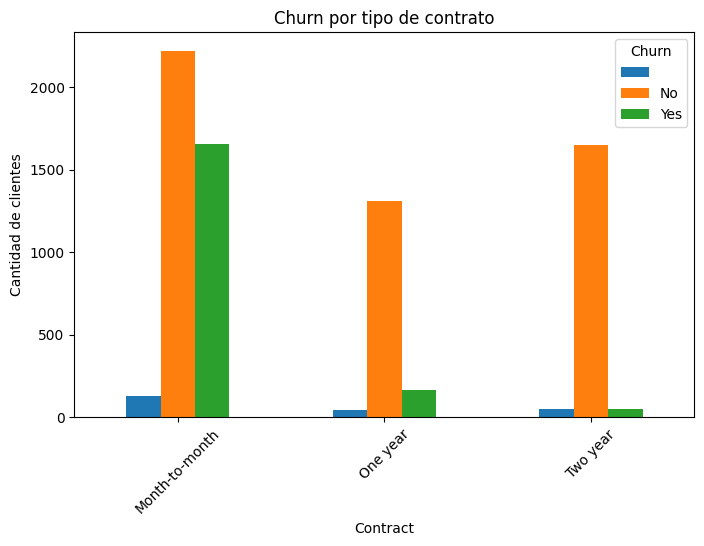

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pdf = df_flat.select("Contract", "Churn").groupBy("Contract", "Churn").count().toPandas()

pivot = pdf.pivot(index="Contract", columns="Churn", values="count")

pivot.plot(kind="bar", figsize=(8,5))
plt.title("Churn por tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=45)
plt.show()

#📄Informe final

### ***Informe Final -TelecomX LATAM***

### **Objetivo**
Analizar los factores asociados al abandono de clientes (churn) para identificar patrones y proponer estrategias de retención.

### **Metodología**
Se realizó la extracción, limpieza y transformacíon de datos en Pyspark. Luego se analizaron variables demográficas, contractuales y de consumo.

### **Principales** **hallazgos**
Mayor churn en contratos **month-to-month.**

Mayor abandono en clientes con **fibra óptica.**

Los clientes que abandonan tienen:

    menor antigüedad

    mayor gasto mensual

### **Conclusión**
El abandono está altamente relacionado con el tipo de contrato, el servicio de internet y el costo mensual.

### **Recomendación**
Incentivar contratos de mayor duración.

Programas de fidelización temprana.

Beneficios a clientes con alto gasto.

Mejorar experiencia en fibra óptica.


